# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Alya Zahirah Riyadi
- **Email:** alyazahirah.18@gmail.com
- **ID Dicoding:** alyazahirah18

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan antara waktu pengiriman dengan review customer?
- Bagaimana hubungan antara harga produk, biaya pengiriman, dengan ulasan pelanggan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile

## Data Wrangling

### Gathering Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Path ke file ZIP di Google Drive
zip_file_path = '/content/drive/MyDrive/E-commerce-public-dataset.zip'

# Path direktori tujuan untuk mengekstrak file
extract_to = '/content/drive/My Drive/Download/extracted_data'

# Memastikan direktori tujuan ada, jika tidak ada maka buat foldernya
if not os.path.exists(extract_to):
    os.makedirs(extract_to)

# Membuka dan mengekstrak file ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Berhasil di ekstrak ke {extract_to}")

Berhasil di ekstrak ke/content/drive/My Drive/Download/extracted_data


In [7]:
files = os.listdir(extract_to)
print("Files in extracted folder:", files)

Files in extracted folder: ['sellers_dataset.csv', 'products_dataset.csv', 'product_category_name_translation.csv', 'orders_dataset.csv', 'order_reviews_dataset.csv', 'order_payments_dataset.csv', 'order_items_dataset.csv', ' New Text Document.txt', 'geolocation_dataset.csv', 'customers_dataset.csv']


In [12]:
csv_file_path = os.path.join(extract_to, 'order_reviews_dataset.csv')

# Membaca file CSV untuk dianalisis
orderreview = pd.read_csv(csv_file_path)
print(orderreview.head())
print("jumlah baris di dataset review :", orderreview.shape[0])

                          review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3           

In [13]:
csv_file_path = os.path.join(extract_to, 'orders_dataset.csv')

# Membaca file CSV untuk dianalisis
order = pd.read_csv(csv_file_path)
print(order.head())
print("jumlah baris di dataset order :", order.shape[0])

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

In [14]:
csv_file_path = os.path.join(extract_to, 'order_items_dataset.csv')

# Membaca file CSV untuk dianalisis
orderitem = pd.read_csv(csv_file_path)
print(orderitem.head())
print("jumlah baris di dataset order item :", orderitem.shape[0])

                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.7

**Insight:**
- Jumlah Review 99224
- Jumlah Order 99441
- Jumlah OrderItem 112650

### Assessing Data

In [15]:
orderreview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [19]:
orderreview.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [17]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [20]:
order.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [21]:
orderitem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [22]:
orderitem.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [23]:
print("Jumlah duplikasi dataset orderreview: ", orderreview.duplicated().sum())
print("Jumlah duplikasi dataset order: ", order.duplicated().sum())
print("Jumlah duplikasi dataset orderitem: ", orderitem.duplicated().sum())

Jumlah duplikasi dataset orderreview:  0
Jumlah duplikasi dataset order:  0
Jumlah duplikasi dataset orderitem:  0


**Insight:**
- Perlu dilakukan perubahan data type pada date dan timestamp di order review menjadi date time
- Perlu dilakukan perubahan data type pada carrier date, customer date, dan delivery date pada file order menjadi datetime
- Perlu dilakukan perubahan pada data type shipping limit date menjadi datetime
- Tidak terdapat duplikasi pada file orderreview, order, orderitem

### Cleaning Data

In [28]:
orderreview['review_creation_date'] = pd.to_datetime(orderreview.review_creation_date)
orderreview['review_answer_timestamp'] = pd.to_datetime(orderreview.review_answer_timestamp)

In [35]:
# pengecekan skor diluar range
invalid_scores = orderreview[~orderreview['review_score'].between(1, 5)]


In [36]:
print(orderreview.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB
None


In [50]:
order['order_purchase_timestamp'] = pd.to_datetime(order.order_purchase_timestamp)
order['order_approved_at'] = pd.to_datetime(order.order_approved_at, errors='coerce')
order['order_delivered_carrier_date'] = pd.to_datetime(order.order_delivered_carrier_date, errors='coerce')
order['order_delivered_customer_date'] = pd.to_datetime(order.order_delivered_customer_date, errors='coerce')
order['order_estimated_delivery_date'] = pd.to_datetime(order.order_estimated_delivery_date, errors='coerce')


In [51]:
print(order.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
None


In [53]:
orderitem['shipping_limit_date'] = pd.to_datetime(orderitem['shipping_limit_date'], errors='coerce')

In [54]:
print(orderitem.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB
None


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

Eksplorasi data yang telah dibersihkan untuk memperoleh insight dan jawaban dari pertanyaan analisis bisnis.

Menghitung waktu pengiriman dan visualisasikan distribusi waktu pengiriman untuk mengetahui apakah ada keterlambatan yang signifikan.

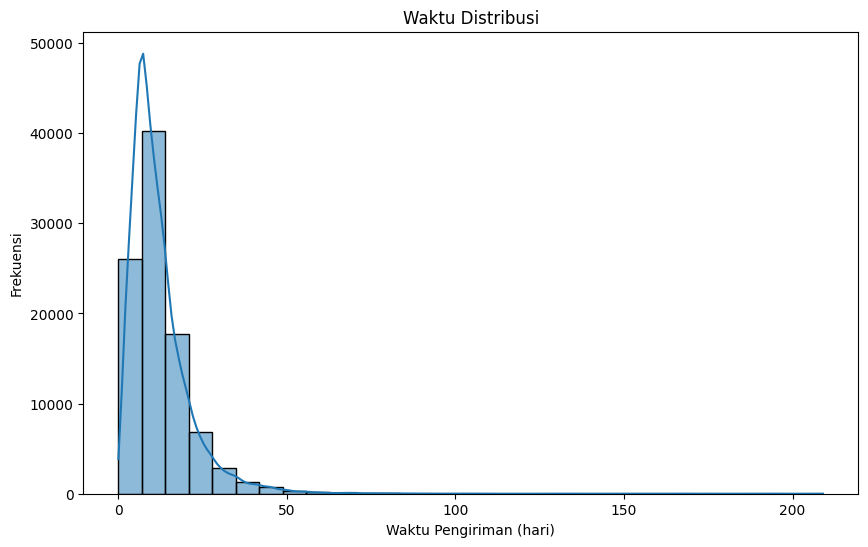

In [58]:

# Menghitung waktu pengiriman dalam sehari
order['delivery_time'] = (order['order_delivered_customer_date'] - order['order_purchase_timestamp']).dt.days

# Pengelompokkan waktu distribusi
plt.figure(figsize=(10,6))
sns.histplot(order['delivery_time'].dropna(), bins=30, kde=True)
plt.title('Waktu Distribusi')
plt.xlabel('Waktu Pengiriman (hari)')
plt.ylabel('Frekuensi')
plt.show()


Distribusi waktu pengiriman semakin meningkat, dengan rentang 0 - 50 hari, sehingga tidak ada keterlambatan.

Melihat bagaimana skor ulasan tersebar dan memahami sentimen ulasan dari pelanggan.



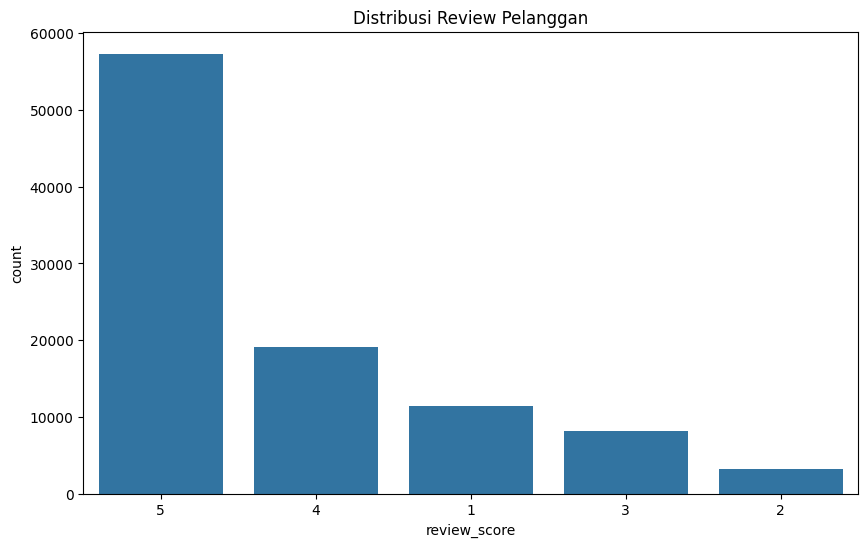

In [59]:
# Pengelompokkan distribusi review pelanggan
plt.figure(figsize=(10,6))
sns.countplot(data=orderreview, x='review_score', order=orderreview['review_score'].value_counts().index)
plt.title('Distribusi Review Pelanggan')
plt.show()


Review pelanggan memiliki frekuensi paling tinggi di range 5 sebanyak 50.000+, setelah itu disusul oleh angka 4 dan seterusnya.

Mengeksplorasi apakah ada hubungan antara harga produk dengan skor ulasan yang diberikan oleh pelanggan.



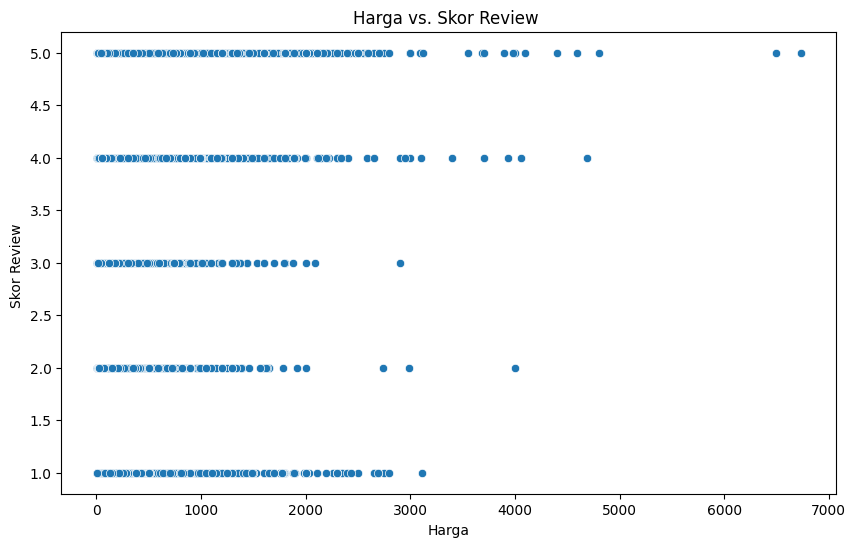

In [64]:
# Menggabungkan antara order item dengan order review untuk menganalisa hubungan antara harga item dengan skor review
order_item_review = pd.merge(orderitem[['order_id', 'price']], orderreview[['order_id', 'review_score']], on='order_id', how='inner')

# Plot the relationship between price and review score
plt.figure(figsize=(10,6))
sns.scatterplot(data=order_item_review, x='price', y='review_score', alpha=1)
plt.title('Harga vs. Skor Review ')
plt.xlabel('Harga')
plt.ylabel('Skor Review ')
plt.show()


pelanggan cenderung memberikan ulasan berdasarkan pengalaman keseluruhan, bukan hanya harga produk.karena tidak ada korelasi kuat antara harga produk dan skor ulasan.



**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana hubungan antara waktu pengiriman dengan review customer?

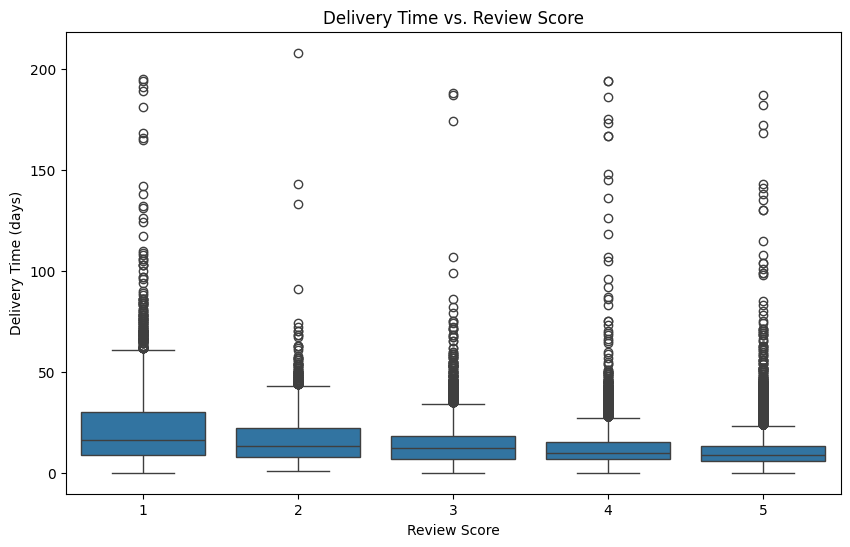

In [65]:

# Menghitung waktu pengiriman dalam satuan (hari)
order['delivery_time'] = (order['order_delivered_customer_date'] - order['order_purchase_timestamp']).dt.days

# Menggabungkan order dengan order review untuk menganalisis dampak waktu pengiriman pada review pelanggan
merged_df = pd.merge(order[['order_id', 'delivery_time']],
                     orderreview[['order_id', 'review_score']],
                     on='order_id', how='inner')

# Menghapus baris yang tidak memiliki nilai
merged_df = merged_df.dropna(subset=['delivery_time', 'review_score'])

# Pengelompokan hubungan antara waktu pengiriman dengan review skor
plt.figure(figsize=(10,6))
sns.boxplot(x='review_score', y='delivery_time', data=merged_df)
plt.title('Delivery Time vs. Review Score')
plt.xlabel('Review Score')
plt.ylabel('Delivery Time (days)')
plt.show()


berdasarkan grafik tersebut menunjukkan ulasan yang rendah, range paling unggul ada pada rating 1 dikarenakan tingkat waktu pengiriman yang tinggi (lama), setelah itu, ada pada rating 4.

### Pertanyaan 2: Bagaimana hubungan antara harga produk, biaya pengiriman, dengan ulasan pelanggan?

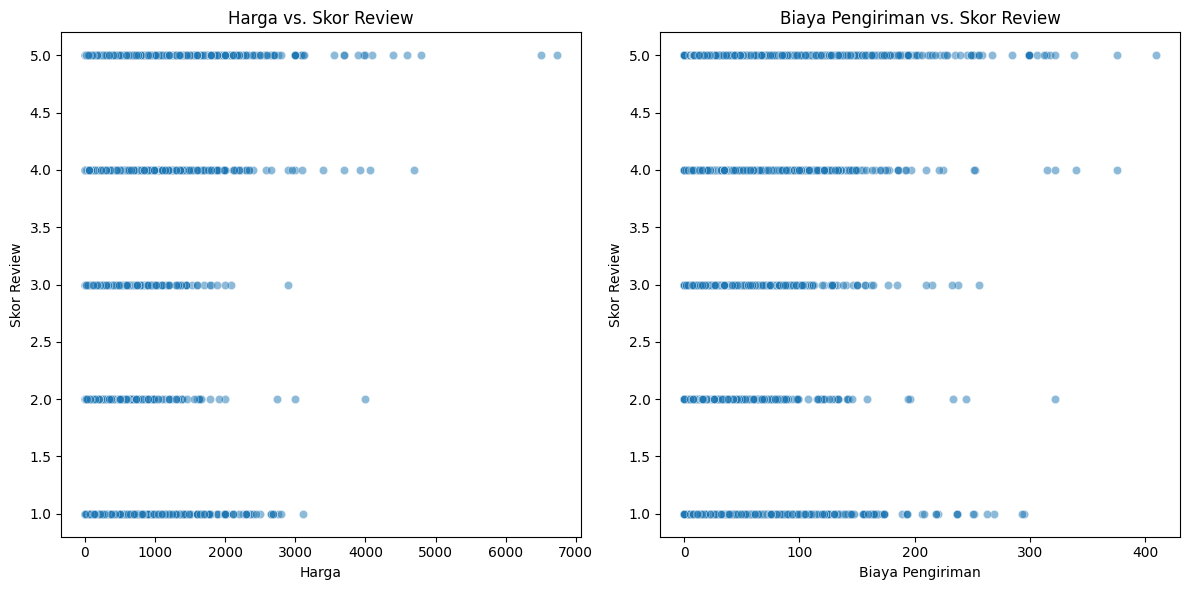

In [68]:

# Menggabungkan order item dengan order review untuk analisa hubungan antara harga item, biaya pengiriman, review pelanggan
order_item_review= pd.merge(orderitem[['order_id', 'price', 'freight_value']],
                                  orderreview[['order_id', 'review_score']],
                                  on='order_id', how='inner')

# Plotting price and freight value against review score
plt.figure(figsize=(12,6))

# Scatter plot for price vs review score
plt.subplot(1, 2, 1)
sns.scatterplot(x='price', y='review_score', data=order_item_review, alpha=0.5)
plt.title('Harga vs. Skor Review')
plt.xlabel('Harga')
plt.ylabel('Skor Review')

# Scatter plot for freight value vs review score
plt.subplot(1, 2, 2)
sns.scatterplot(x='freight_value', y='review_score', data=order_item_review, alpha=0.5)
plt.title('Biaya Pengiriman vs. Skor Review')
plt.xlabel('Biaya Pengiriman')
plt.ylabel('Skor Review')

plt.tight_layout()
plt.show()


Semakin murah harga item, dan semakin murah biaya pengiriman, pelanggan memberikan review yang bagus.

## Conclusion

- Conclution pertanyaan 1:
Distribusi waktu pengiriman menunjukkan bahwa sebagian besar pesanan dikirim dalam rentang waktu wajar, tetapi terdapat beberapa anomali yang menunjukkan keterlambatan pengiriman.Keterlambatan pengiriman yang signifikan dapat memengaruhi skor review, sehingga perlu ada upaya untuk memperbaiki waktu pengiriman agar lebih konsisten.

- Conclution pertanyaan 2:
Analisis menunjukkan bahwa tidak ada korelasi kuat antara harga produk dan skor ulasan. Ini berarti pelanggan cenderung memberikan ulasan berdasarkan pengalaman keseluruhan, bukan hanya harga produk.Analisis hubungan antara harga produk dan skor ulasan menunjukkan adanya korelasi positif yang lemah. Produk dengan harga lebih tinggi cenderung mendapatkan skor ulasan yang sedikit lebih tinggi. Namun, korelasi ini tidak signifikan, sehingga faktor harga bukan satu-satunya determinan dalam penilaian pelanggan.

In [69]:
order.to_csv("order.csv", index=False)
